In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.animation import FuncAnimation

rc('animation', html='jshtml')

In [14]:
import tensorflow as tf

#opt = tf.keras.optimizers.SGD(learning_rate = 0.45)
#opt = tf.keras.optimizers.SGD(learning_rate = 0.45, momentum=0.55)
#opt = tf.keras.optimizers.SGD(learning_rate = 0.2, momentum=0.55)
#opt = tf.keras.optimizers.SGD(learning_rate = 0.2)
#opt = tf.keras.optimizers.RMSprop(learning_rate = 0.1)
#opt = tf.keras.optimizers.RMSprop(learning_rate = 0.2)
opt = tf.keras.optimizers.Adam(learning_rate = 0.45)
#opt = tf.keras.optimizers.Adam(learning_rate = 0.2)

In [15]:
w1 = tf.Variable(0.45)
w2 = tf.Variable(0.45)
loss = lambda: (4*0.1*w1**2 + 4*w2**2)/2.0

In [16]:
x_stt = -0.5
x_end = 0.5
y_stt = -0.5
y_end = 0.5

x = np.linspace(x_stt, x_end, 21)
y = np.linspace(y_stt, y_end, 21)
z = np.array([(4*0.1*i*i+4*j*j)/2.0 for j in y for i in x])

X, Y = np.meshgrid(x,y)
Z = z.reshape(21,21)

w1_log = []
w2_log = []

for epoch in range(0,100):
  w1_log.append(w1.numpy())
  w2_log.append(w2.numpy())
  step_count = opt.minimize(loss, [w1,w2])
  #step_count = opt.minimize(loss, [w1,w2]).numpy()
print(w1.numpy(), w2.numpy())

-0.0006717419 -0.0006721651


<ipython-input-17-ca8cb1534e7e>:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ax3.set_data(w1_log[i], w2_log[i])


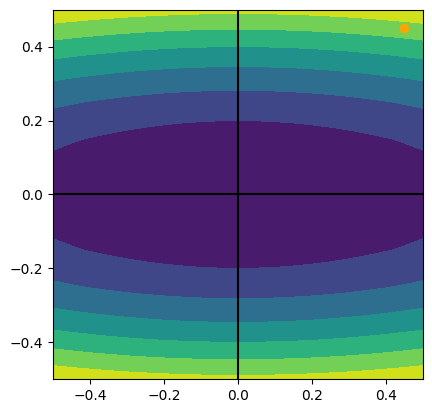

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.contourf(X,Y,Z)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([x_stt,x_end, y_stt, y_end])
ax2, = ax.plot([],[], color='orange')
ax3, = ax.plot([],[], 'o', color='orange')

def animate(i):
  ax2.set_data(w1_log[0:i], w2_log[0:i])
  ax3.set_data(w1_log[i], w2_log[i])
  return (ax2,)

i = np.arange(len(w1_log))
ani = FuncAnimation(fig, animate, frames=i, interval=100)
ani